<a href="https://colab.research.google.com/github/Agil0509/NLP/blob/main/micrograd_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return 3*x**2-4*x+5

In [ ]:
f(3.0)

20.0

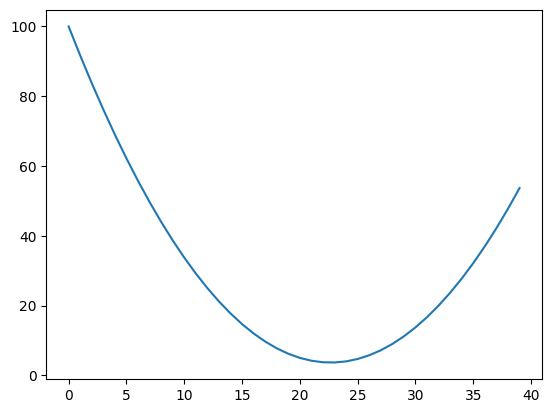

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(ys)

In [ ]:
h = 0.001
x = 3
print(f(h+x))
print(f(x+h)-f(x))
print((f(x+h)-f(x))/h)

20.014003000000002
0.01400300000000243
14.00300000000243


In [ ]:
 a = 2
 b = -3
 c = 10
 d = a*b+c
 print(d)

4


In [ ]:
h = 0.001

a = 2
b = -3
d1 = a*b+c
c+=h
d2 = a*b+c

print(f'{d1=};{d2}')
print('slop',(d2-d1)/h)

d1=4;4.0009999999999994
slop 0.9999999999994458


In [ ]:
isinstance(5,int)

True

In [ ]:
assert  isinstance('5',(int,float)) ,":)"  # erroru idare edir istediyimiz sey yaza bilerik

AssertionError: :)

In [ ]:
# __Magic methoddan ireli gelir (biz onalri cagirmiriq ozu ise dusur)

class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f'Value(data = {self.data})'


    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad = other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other):
        return self * other


    def __truediv__(self, other):
        return self * other ** -1


    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __radd__(self,other):
      return self + other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out


    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        topo

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'

In [ ]:

a = Value(data = 2,label = 'a')
b = Value(data = -3, label = 'b')
c = Value(data = 10, label = 'c')
a+b
# a.__add__(c)

Value(data = -1)

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)

  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

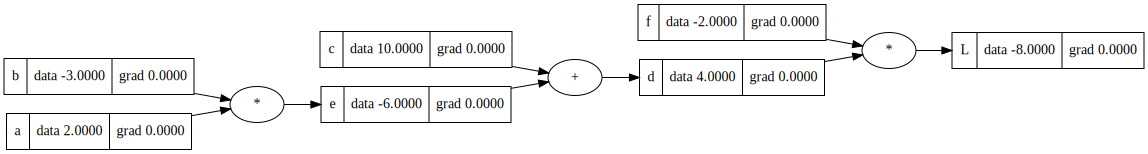

In [ ]:
draw_dot(L)

In [ ]:

L.grad = 1.0
f.grad = 4.0
d.grad = -2
c.grad = -2
e.grad = -2.0
a.grad = 6
b.grad =-4

In [ ]:
a.data+=0.01 * a.grad
b.data+=0.01 * b.grad
c.data+=0.01 * b.grad
f.data+=0.01 * f.grad
e = a*b
d = e+c
L = d*f
print(L.data)

-7.247296


In [ ]:
def lol():
  h = 0.001


  a = Value(data = 2,label = 'a')
  b = Value(data = -3, label = 'b')
  c = Value(data = 10, label = 'c')
  e = a*b; e.label = 'e'
  d = e+c;d.label = 'd'
  f = Value(-2,label = 'f')
  L = d*f ;L.label = 'L'
  L1 = L.data

  a = Value(2.0,label = 'a')
  a.data +=h
  b = Value(data = -3, label = 'b')
  c = Value(data = 10, label = 'c')
  e = a*b; e.label = 'e'
  d = e+c;d.label = 'd'
  f = Value(-2,label = 'f')
  L = d*f ;L.label = 'L'
  L2 = L.data

  print((L2-L1)/h)

lol()

6.000000000000227


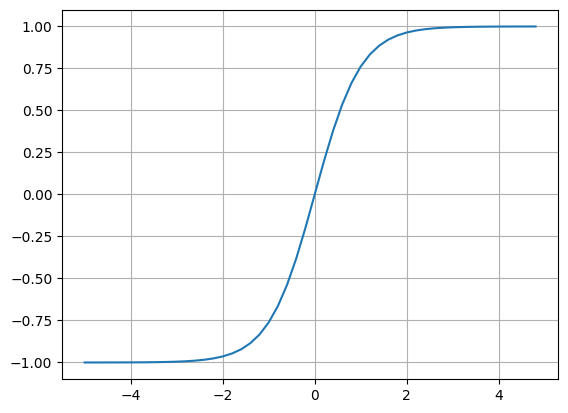

In [ ]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));
plt.grid()

In [ ]:
x1 = Value(2,label = 'x1')
x2 = Value(0,label = 'x2')

w1 = Value(-3.0,label = 'w1')
w2 = Value(1.0,label = 'w2')

b = Value(6.8813735870195432,label = 'b')

x1w1 = x1*w1;x1w1.label = 'x1*w1'
x2w2 = x2*w2;x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n  = x1w1x2w2 + b;n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()

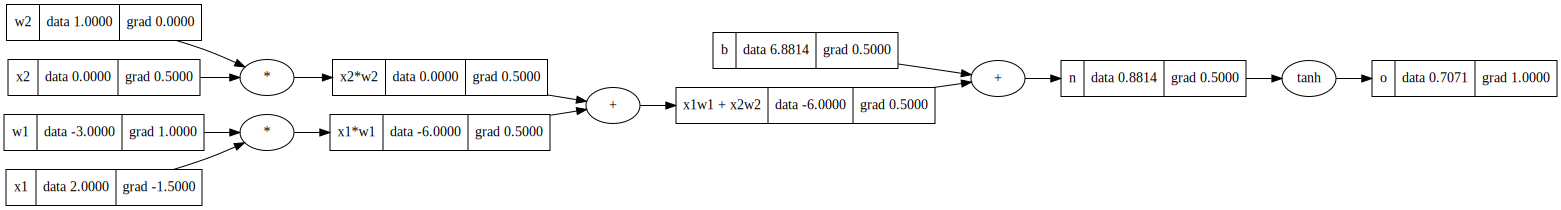

In [ ]:
draw_dot(o)

In [ ]:
1- o.grad**2

0.0

In [ ]:
o.grad = 1
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x1.grad = -1.5
w1.grad = 1
x2.grad = 0.5
w2.grad = 0

In [ ]:
o.grad = 1.0

In [ ]:
o._backward()

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x1w1._backward()

In [ ]:
x2w2._backward()

In [ ]:
o.grad = 1.0

topo = []
visited = set()

def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

for node in reversed(topo):
  node._backward()

In [ ]:
1 * a

Value(data = 2.06)

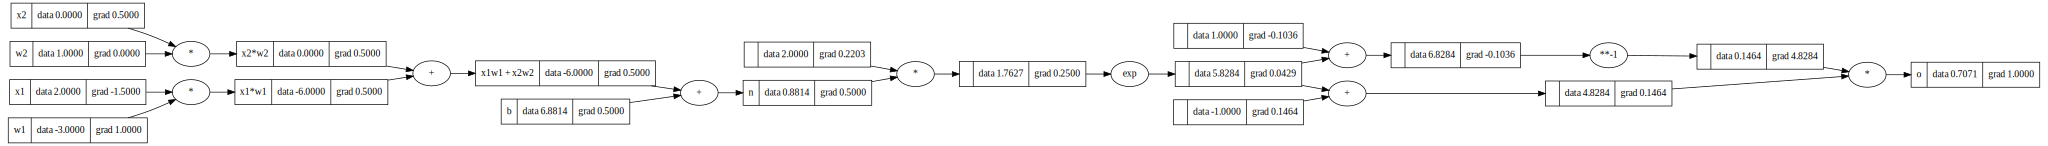

In [ ]:
x1 = Value(2,label = 'x1')
x2 = Value(0,label = 'x2')

w1 = Value(-3.0,label = 'w1')
w2 = Value(1.0,label = 'w2')

b = Value(6.8813735870195432,label = 'b')

x1w1 = x1*w1;x1w1.label = 'x1*w1'
x2w2 = x2*w2;x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1w1 + x2w2'
n  = x1w1x2w2 + b;n.label = 'n'

e = (2*n).exp()
o = (e-1)/(e+1)

o.label = 'o'
o.backward()
draw_dot(o)

In [ ]:
1*a

Value(data = 2.06)

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double()  ;x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()   ;x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()   ;w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()     ;w2.requires_grad = True

b = torch.Tensor([6.88137]).double()

n= x1*w1 +x2*w2 +b
o = torch.tanh(n)


print(o.data.item())
o.backward()


print('X2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071050214706146
X2 0.5000024886110417
w2 0.0
x1 -1.500007465833125
w1 1.0000049772220834


In [ ]:
import random

class Neuron:

  def __init__(self,nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self,x):
    act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]


class Layer:

  def __init__(self,nin,nout):
    self.neurons  = [Neuron(nin) for _ in range(nout)]

  def __call__(self,x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs)  ==1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data = -0.8906150483574831)

In [ ]:
n.parameters()

[Value(data = -0.8963346108743766),
 Value(data = -0.4748973922075248),
 Value(data = -0.404440650568632),
 Value(data = 0.5967032947465729),
 Value(data = 0.45191652165732354),
 Value(data = 0.6474832823892969),
 Value(data = 0.6478179727591147),
 Value(data = -0.3195621062394798),
 Value(data = 0.6086435278719371),
 Value(data = 0.41419050738386365),
 Value(data = -0.0991134475444102),
 Value(data = -0.36346902269051506),
 Value(data = 0.7447499262904738),
 Value(data = -0.4105279701506197),
 Value(data = 0.0938247188003527),
 Value(data = 0.3968250203946162),
 Value(data = 0.29584765131699764),
 Value(data = 0.3097778457624074),
 Value(data = 0.9723950823256897),
 Value(data = -0.16441020416098717),
 Value(data = 0.8158407808996166),
 Value(data = 0.6113094587458421),
 Value(data = -0.2767553621162586),
 Value(data = 0.325637917371594),
 Value(data = -0.27560420395431584),
 Value(data = -0.29087146504735295),
 Value(data = 0.4938918670296413),
 Value(data = 0.07066015568996598),
 Va

In [ ]:


# x = [2.0,1.0]
# n = Neuron(2)
# n(x)

In [ ]:
# x = [2.0,1.0]
# n = Layers(2,3)
# n(x)

[Value(data = -0.9843543598359129),
 Value(data = -0.03512054494846989),
 Value(data = 0.18590585906722826)]

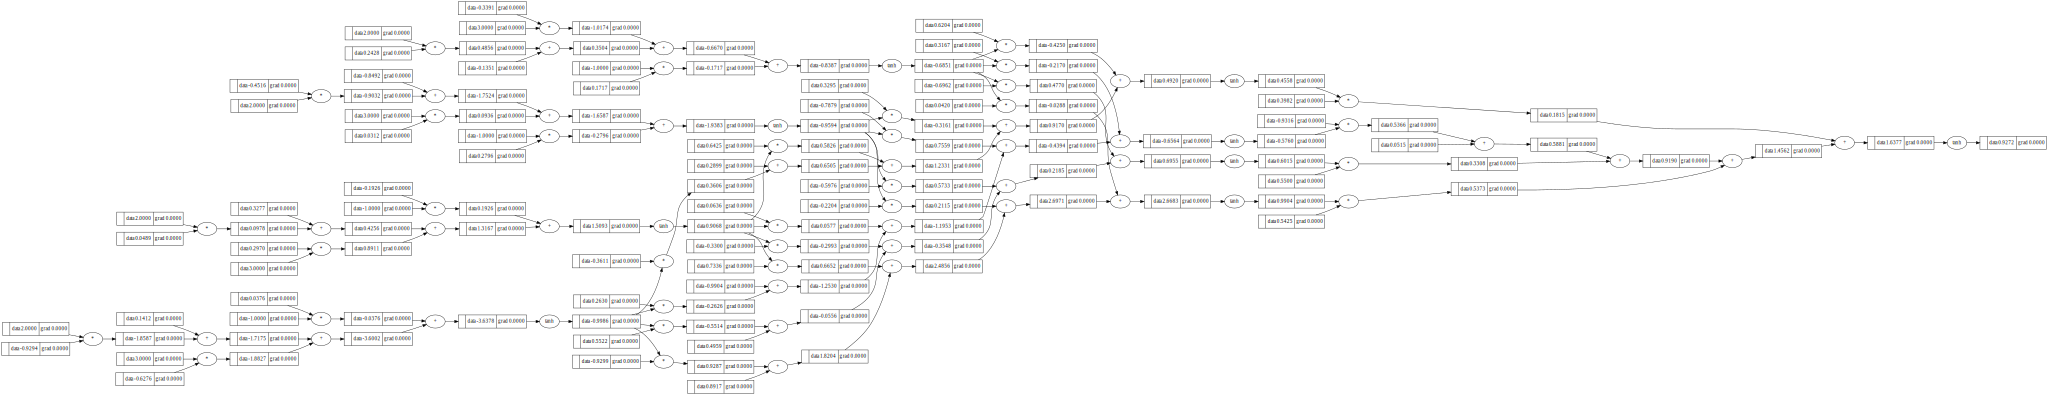

In [ ]:
draw_dot(n(x))

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]


ypred = [n(x) for x in xs]
ypred

[Value(data = 0.9271562890501999),
 Value(data = 0.7830862786823878),
 Value(data = 0.9159525603914195),
 Value(data = 0.9145385955132355)]

In [ ]:
loss = [((yout - ygt)**2).data for ygt,yout in zip(ys,ypred)]
sum(loss)

6.86288074877763

In [ ]:
loss = sum(((yout - ygt)**2 for ygt,yout in zip(ys,ypred)))
loss.backward()

In [ ]:
n.layers[0].neurons[0].w[0].grad


-0.01770838489598464

In [ ]:
n.layers[0].neurons[0].w[0].data

-0.9293727112469143

In [ ]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [ ]:
for k in range(20):
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt,yout in zip(ys,ypred))


  for p in n.parameters():
    p.grad = 0.0

  loss.backward()

  for p in n.parameters():

    p.data  += -0.1*p.grad

  print(k,loss.data)

0 7.152198979395974
1 6.036430944769931
2 4.061036156900959
3 3.5805224211231454
4 3.1360579761801426
5 2.90740108198515
6 2.540458832085558
7 1.1229153545211321
8 0.03560062522457822
9 0.0314591694208225
10 0.02818805484175247
11 0.025531249001149618
12 0.02332732646544908
13 0.021468204065021042
14 0.019878266626539104
15 0.01850279443113274
16 0.01730110196794859
17 0.016242255298052163
18 0.01530228756505095
19 0.014462327204538362


In [ ]:
e